In [1]:
import numpy
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [3]:
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

In [7]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import ZeroPadding2D
from keras.models import Model
from keras.layers import Dropout
from models import alexnet_cifar

In [8]:
model=alexnet_cifar(input_shape=(32,32,3),classes=10)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 48)        1344      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 96)        41568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 192)         166080    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 192)         331968    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)         442624    
__________

In [9]:
train_history=model.fit(X_img_train_normalize ,y_label_train_OneHot, epochs = 10,validation_split=0.2,verbose=1,batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 312s 8ms/step - loss: 1.8219 - acc: 0.2903 - val_loss: 1.4508 - val_acc: 0.4451
Epoch 2/10
40000/40000 [==============================] - 305s 8ms/step - loss: 1.3659 - acc: 0.5031 - val_loss: 1.1743 - val_acc: 0.5814
Epoch 3/10
40000/40000 [==============================] - 310s 8ms/step - loss: 1.1478 - acc: 0.5968 - val_loss: 1.0237 - val_acc: 0.6336
Epoch 4/10
40000/40000 [==============================] - 311s 8ms/step - loss: 1.0071 - acc: 0.6511 - val_loss: 0.9955 - val_acc: 0.6491
Epoch 5/10
40000/40000 [==============================] - 316s 8ms/step - loss: 0.8846 - acc: 0.6936 - val_loss: 0.9007 - val_acc: 0.6860
Epoch 6/10
40000/40000 [==============================] - 326s 8ms/step - loss: 0.7735 - acc: 0.7341 - val_loss: 0.9224 - val_acc: 0.6809
Epoch 7/10
40000/40000 [==============================] - 318s 8ms/step - loss: 0.6915 - acc: 0.7625 - val_loss: 0.9406 - 

In [10]:
#X_img_test_normalize
#y_label_test_OneHot
preds=model.evaluate(X_img_test_normalize,y_label_test_OneHot)
print("Validation loss="+str(preds[0]))
print("Validation accuracy="+str(preds[1]))

10000/10000 [==============================] - 23s 2ms/step
Validation loss=1.0797915964126588
Validation accuracy=0.6899


In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

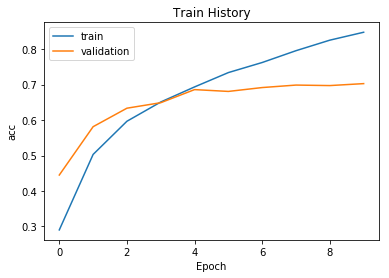

In [12]:
show_train_history(train_history,'acc','val_acc')

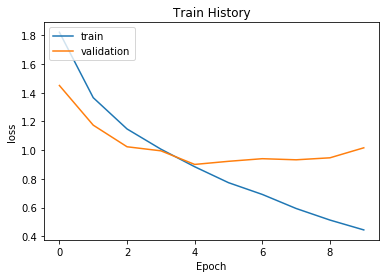

In [13]:
show_train_history(train_history,'loss','val_loss')

In [14]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [15]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[idx][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [16]:
prediction=model.predict_classes(X_img_test_normalize)

10000/10000 [==============================] - 24s 2ms/step


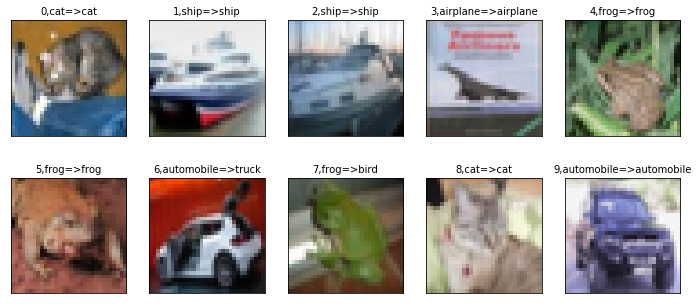

In [17]:
plot_images_labels_prediction(X_img_test,y_label_test,
                              prediction,0,10)

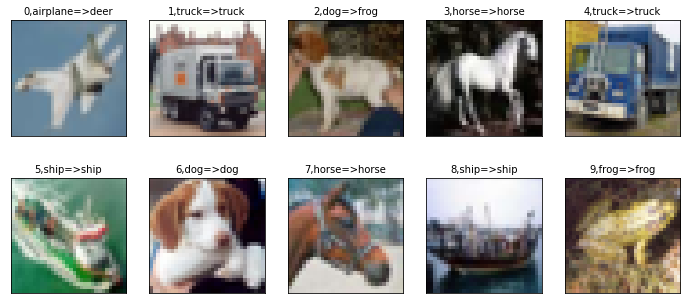

In [18]:
plot_images_labels_prediction(X_img_test,y_label_test,
                              prediction,10,10)

In [19]:
import pandas as pd
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predicat'])

predicat,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,740,7,61,33,34,4,8,14,72,27
1,29,713,6,36,7,26,16,5,56,106
2,62,0,544,120,109,86,50,16,9,4
3,14,2,53,585,68,208,30,23,7,10
4,8,0,47,98,701,42,39,54,10,1
5,6,2,30,232,52,626,12,33,2,5
6,7,2,46,137,44,36,720,2,4,2
7,9,1,21,58,98,122,3,679,3,6
8,59,9,17,51,12,9,2,2,822,17


In [20]:
preds

[1.0797915964126588, 0.6899]